## section2

### click_waveform

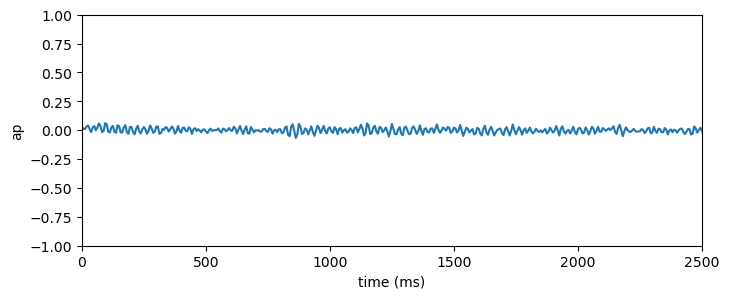

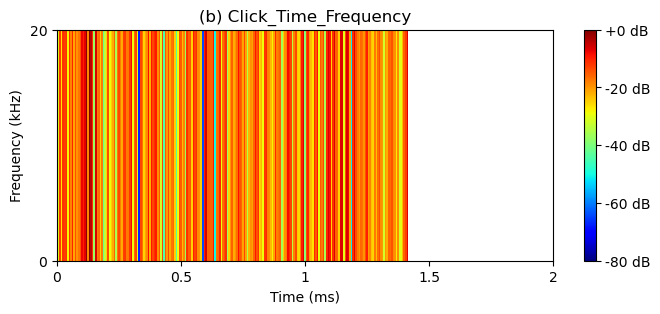

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav"
waveform, sr = librosa.load(click_path, sr = None)
time = librosa.times_like(waveform, sr=sr) * 1000  # 时间转换为毫秒

# 绘制波形图
plt.figure(figsize=(8, 3))
plt.plot(time, waveform)
plt.xlabel('time (ms)')
plt.ylabel('ap')
plt.xlim(0, 2500)  # 调整显示的时间范围
plt.ylim(-1, 1)  # 根据幅度范围调整
plt.show()


click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav"
y, sr = librosa.load(click_path, sr = None)
# 计算短时傅里叶变换 (STFT)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# 将时间转换为毫秒
times = librosa.times_like(S_db, sr=sr) * 1000  # 时间转换为毫秒
frequencies = librosa.fft_frequencies(sr=sr) / 1000  # 频率转换为 kHz

# 绘制频谱图
plt.figure(figsize=(8, 3))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet', hop_length=512)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (kHz)')
plt.colorbar(format='%+2.0f dB')
plt.xlim(0, 2)  # 可根据需要调整时间范围
plt.ylim(0, 20)  # 可根据需要调整频率范围
plt.title('(b) Click_Time_Frequency')
plt.show()

### Whistle_waveform

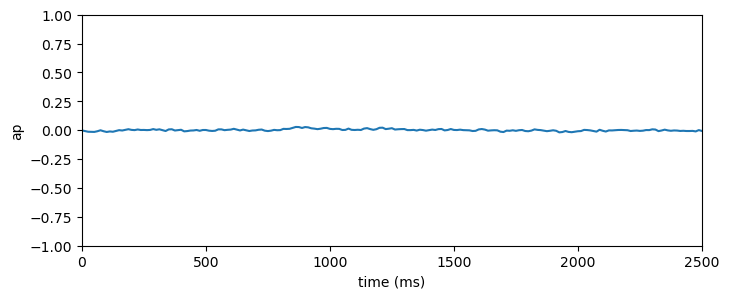

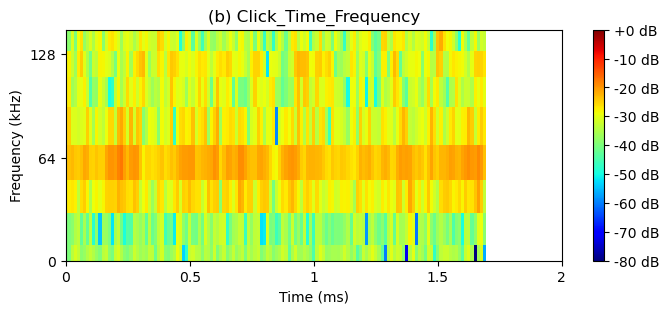

In [7]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/whistle.wav"
waveform, sr = librosa.load(click_path, sr = None)
time = librosa.times_like(waveform, sr=sr) * 1000  # 时间转换为毫秒

# 绘制波形图
plt.figure(figsize=(8, 3))
plt.plot(time, waveform)
plt.xlabel('time (ms)')
plt.ylabel('ap')
plt.xlim(0, 2500)  # 调整显示的时间范围
plt.ylim(-1, 1)  # 根据幅度范围调整
plt.show()


click_path = "/Users/baijingyuan/jupyterPj/reproducibility/data/whistle.wav"
y, sr = librosa.load(click_path, sr = None)
# 计算短时傅里叶变换 (STFT)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# 将时间转换为毫秒
times = librosa.times_like(S_db, sr=sr) * 1000  # 时间转换为毫秒
frequencies = librosa.fft_frequencies(sr=sr) / 1000  # 频率转换为 kHz

# 绘制频谱图
plt.figure(figsize=(8, 3))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet', hop_length=512)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (kHz)')
plt.colorbar(format='%+2.0f dB')
plt.xlim(0, 2)  # 可根据需要调整时间范围
plt.ylim(0, 150)  # 可根据需要调整频率范围
plt.title('(b) Click_Time_Frequency')
plt.show()

### feature_analysis

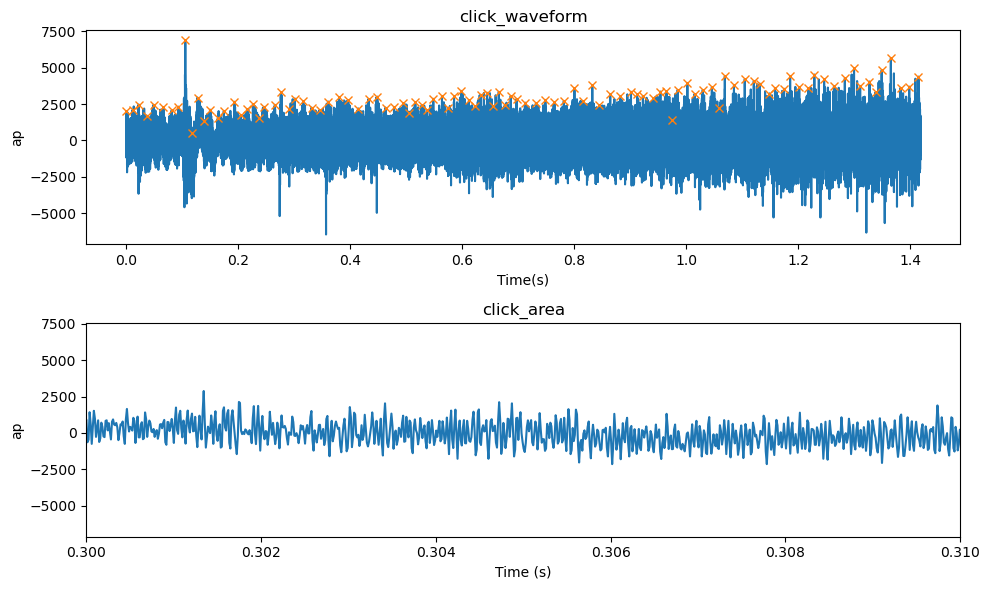

click持续时间： [0.0112548828125, 0.011181640625, 0.01402587890625, 0.012451171875, 0.01724853515625, 0.01505126953125, 0.01197509765625, 0.01229248046875, 0.011083984375, 0.01070556640625, 0.0116943359375, 0.0106201171875, 0.01414794921875, 0.01043701171875, 0.01903076171875, 0.01109619140625, 0.0113525390625, 0.01051025390625, 0.01048583984375, 0.0102294921875, 0.0184326171875, 0.01124267578125, 0.0144775390625, 0.0101318359375, 0.0150634765625, 0.01466064453125, 0.01451416015625, 0.01517333984375, 0.0194091796875, 0.016552734375, 0.017431640625, 0.01861572265625, 0.01573486328125, 0.0146240234375, 0.01514892578125, 0.01614990234375, 0.01009521484375, 0.01134033203125, 0.01162109375, 0.010107421875, 0.0103759765625, 0.015966796875, 0.01063232421875, 0.010888671875, 0.01253662109375, 0.01409912109375, 0.01065673828125, 0.01064453125, 0.0109130859375, 0.0103759765625, 0.01060791015625, 0.0107666015625, 0.010546875, 0.0104736328125, 0.0158203125, 0.01861572265625, 0.0170166015625, 0.01627197

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

# 读取音频数据
sample_rate, data = wavfile.read('/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav')
time = np.arange(len(data)) / sample_rate

# 找到click的峰值（根据实际情况设置height和distance参数）
peaks, _ = find_peaks(data, height=0.5, distance=sample_rate*0.01)  # 这里0.01s是最小间隔时间，可调节
click_times = time[peaks]

# 计算click持续时间和间隔
click_durations = []
for i in range(len(peaks) - 1):
    start = peaks[i]
    end = peaks[i + 1]
    duration = (end - start) / sample_rate
    click_durations.append(duration)

# 绘制click声音波形及zoomed图
plt.figure(figsize=(10, 6))

# (a) 绘制click声音波形图
plt.subplot(2, 1, 1)
plt.plot(time, data)
plt.plot(time[peaks], data[peaks], "x")
plt.title("click_waveform")
plt.xlabel("Time(s)")
plt.ylabel("ap")

# (b) 缩放特定区域进行详细分析
zoom_start, zoom_end = 0.3, 0.31  # 根据需要调整放大区域
plt.subplot(2, 1, 2)
plt.plot(time, data)
plt.xlim(zoom_start, zoom_end)
plt.title("click_area")
plt.xlabel("Time (s)")
plt.ylabel("ap")

plt.tight_layout()
plt.show()

# 打印click持续时间和间隔
print("click持续时间：", click_durations)
print("相邻click间隔时间：", np.diff(click_times))


### 时延差编码
[](/Users/baijingyuan/jupyterPj/reproducibility/code/pictures/2-6.png)
<img src=pictures/2-6.png width = 700>

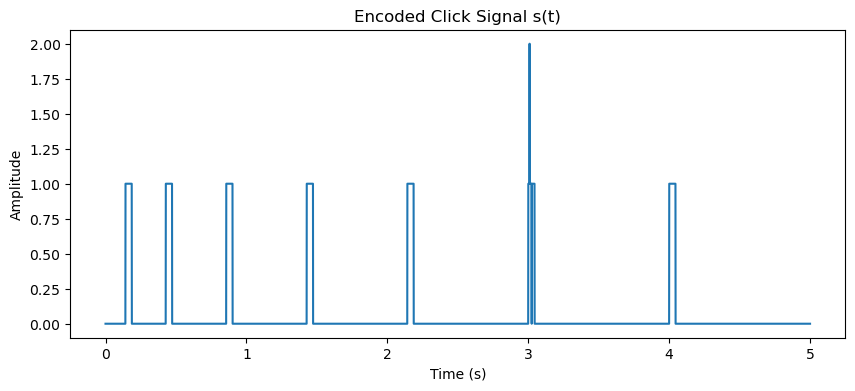

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calcu_d_min(T_c, n):
    return T_c / (2**n - 1)

def calcu_delays(d_min, n):
    return [k * d_min for k in range(1, 2 ** n)]

def click_signal(t, start_time, duration): # t time vector
    signal = np.zeros_like(t)
    start_index = int(start_time * len(t) / max(t))
    end_index = start_index + int(duration * len(t) / max(t))
    signal[start_index:end_index] = 1  # Set the signal to 1 during the click duration
    return signal

def generate_encoded_signal(T_c, n, click_durations, total_time):
    """Generate the encoded click signal based on formula (2-3)."""
    d_min = calcu_d_min(T_c, n)
    delays = calcu_delays(d_min, n)
    
    # Time vector
    t = np.linspace(0, total_time, int(total_time * 1000))  # 1 ms time steps
    
    # Generate the signal
    s_t = np.zeros_like(t)
    for j in range(len(delays)):
        delay_sum = sum(delays[:j+1])  # Accumulated delay for this series
        for l in range(len(click_durations)):
            duration_sum = sum(click_durations[:l])  # Accumulated duration
            click_start_time = delay_sum + duration_sum  # Start time for this click
            
            # Add this click signal to the total signal
            s_t += click_signal(t, click_start_time, click_durations[l])
    
    return t, s_t


# Parameters
T_c = 1.0 
n = 3      
click_durations = [0.01, 0.015, 0.02]  # Duration for each click in seconds
total_time = 5.0  # Total signal duration in seconds

# Generate the encoded click signal
t, s_t = generate_encoded_signal(T_c, n, click_durations, total_time)

# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(t, s_t)
plt.title("Encoded Click Signal s(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


### 时频域特征分析

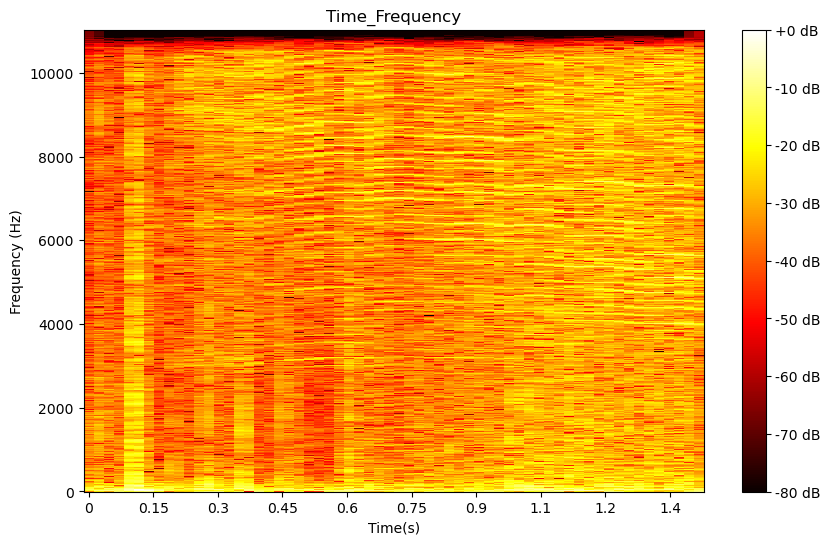

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 加载音频文件（
file_path = '/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav'
y, sr = librosa.load(file_path)

# 进行短时傅里叶变换（STFT）
D = librosa.stft(y, n_fft = 2048)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# 绘制时频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='hot')
plt.colorbar(format="%+2.0f dB")
plt.title('Time_Frequency')
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')
plt.show()


## section 3

### click denosing

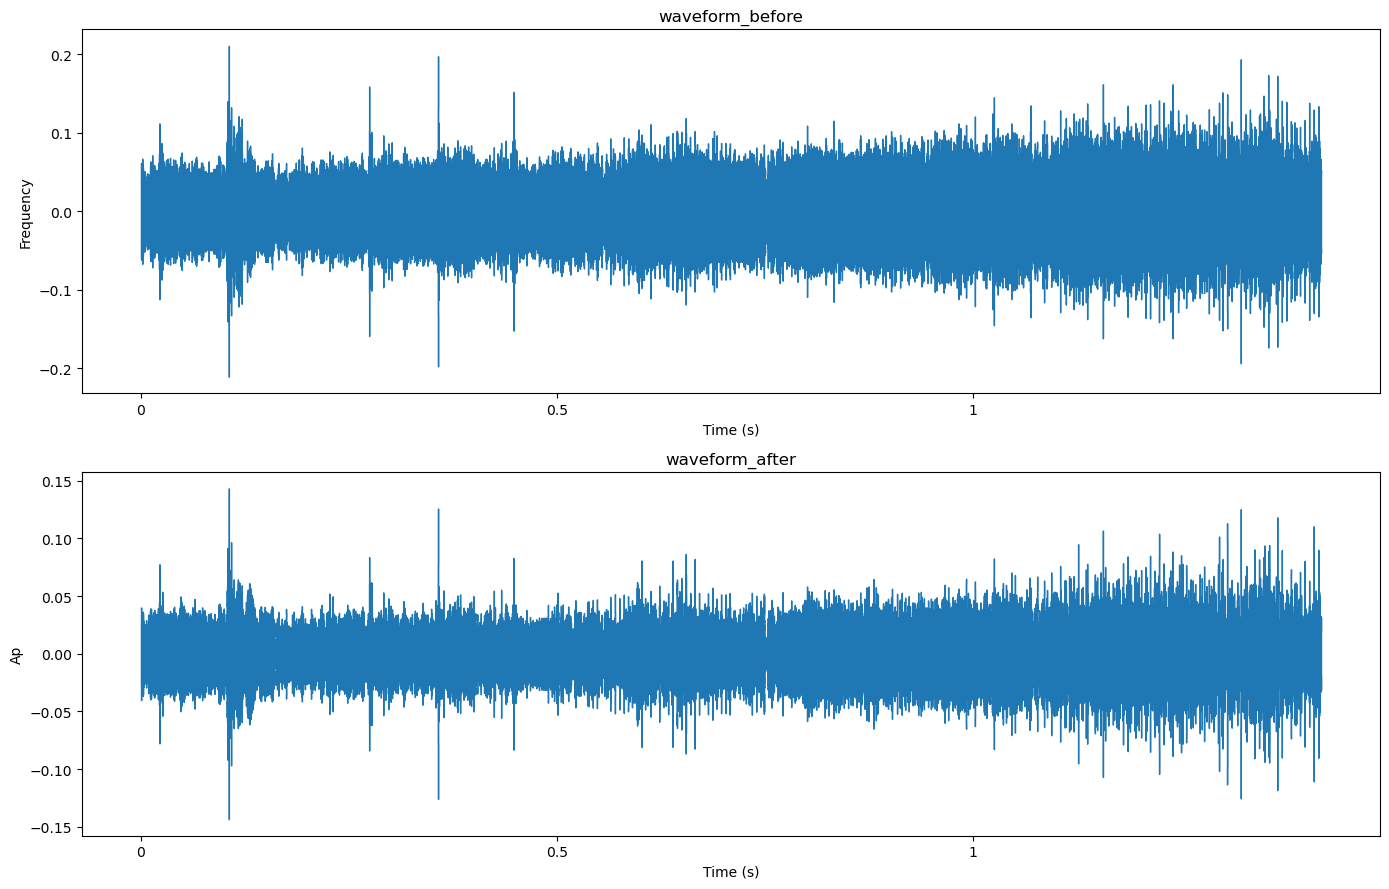

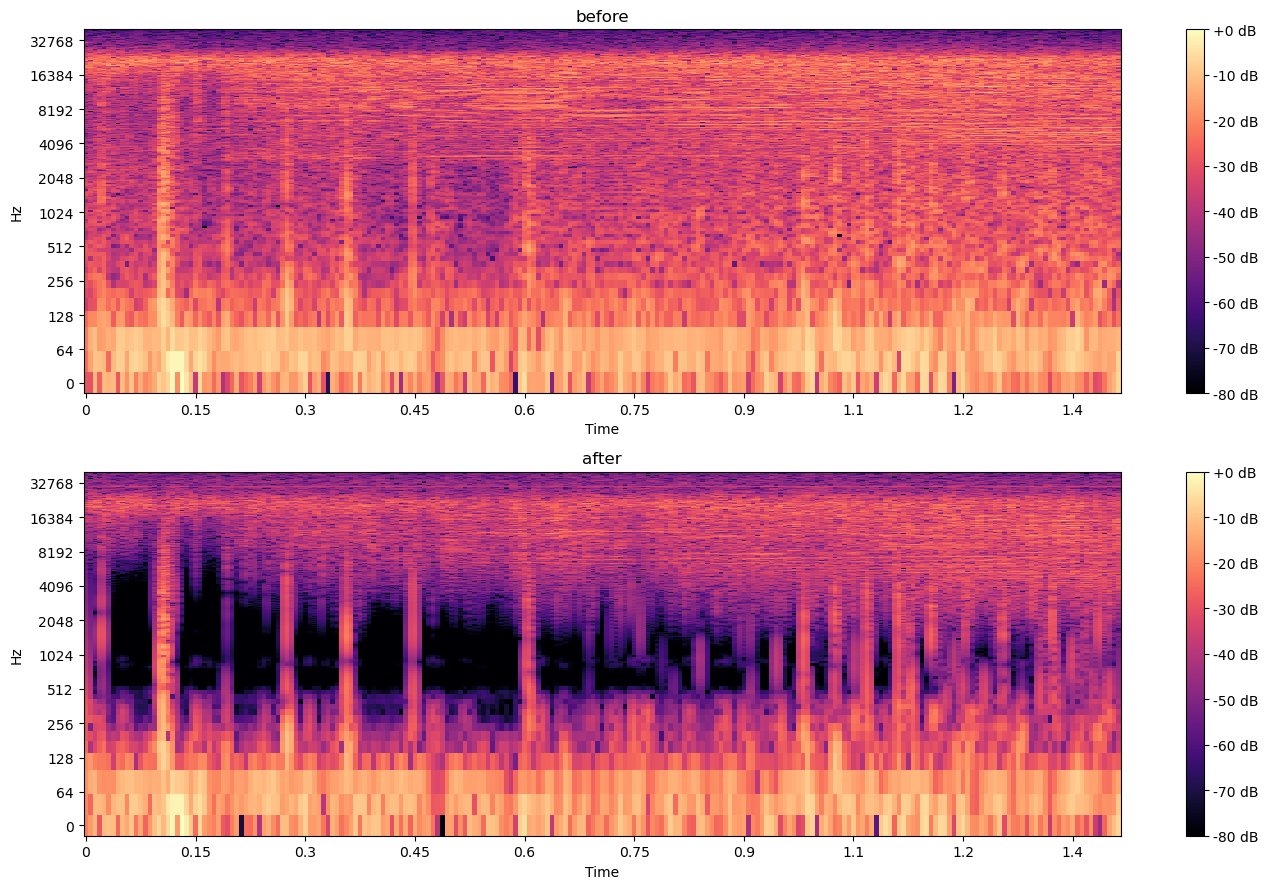

In [16]:
import numpy as np
import librosa
import pywt  # 用于小波变换
import matplotlib.pyplot as plt
import librosa.display

# 加载音频文件
audio_path = '/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav'  # 替换为实际的音频文件路径
y, sr = librosa.load(audio_path, sr=None)

# 设置小波去噪的参数
wavelet = 'sym8'  # Symlet小波
level = 10        # 分解层数
threshold = 0.2   # 阈值，可以根据需要调整

# 定义小波去噪函数
def wavelet_denoising(y, wavelet='sym8', level=10, threshold=0.2):
    coeffs = pywt.wavedec(y, wavelet, level=level)
    # 对细节系数应用阈值处理
    thresholded_coeffs = [pywt.threshold(c, threshold * np.max(c), mode='soft') for c in coeffs[1:]]
    # 将逼近系数和处理后的细节系数组合
    coeffs_denoised = [coeffs[0]] + thresholded_coeffs
    # 重构信号
    return pywt.waverec(coeffs_denoised, wavelet)


y_denoised = wavelet_denoising(y, wavelet=wavelet, level=level, threshold=threshold)

# 绘制原始信号和去噪信号的时域波形
plt.figure(figsize=(14, 9))

# 去噪前的时域波形
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('waveform_before')
plt.xlabel('Time (s)')
plt.ylabel('Frequency')

# 去噪后的时域波形
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_denoised, sr=sr)
plt.title('waveform_after')
plt.xlabel('Time (s)')
plt.ylabel('Ap')

plt.tight_layout()
plt.show()

# 绘制原始信号和去噪信号的频谱图
plt.figure(figsize=(14, 9))

# 去噪前的频谱图
plt.subplot(2, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('before')

# 去噪后的频谱图
plt.subplot(2, 1, 2)
D_denoised = librosa.amplitude_to_db(np.abs(librosa.stft(y_denoised)), ref=np.max)
librosa.display.specshow(D_denoised, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('after')

plt.tight_layout()
plt.show()


### 过零率检测

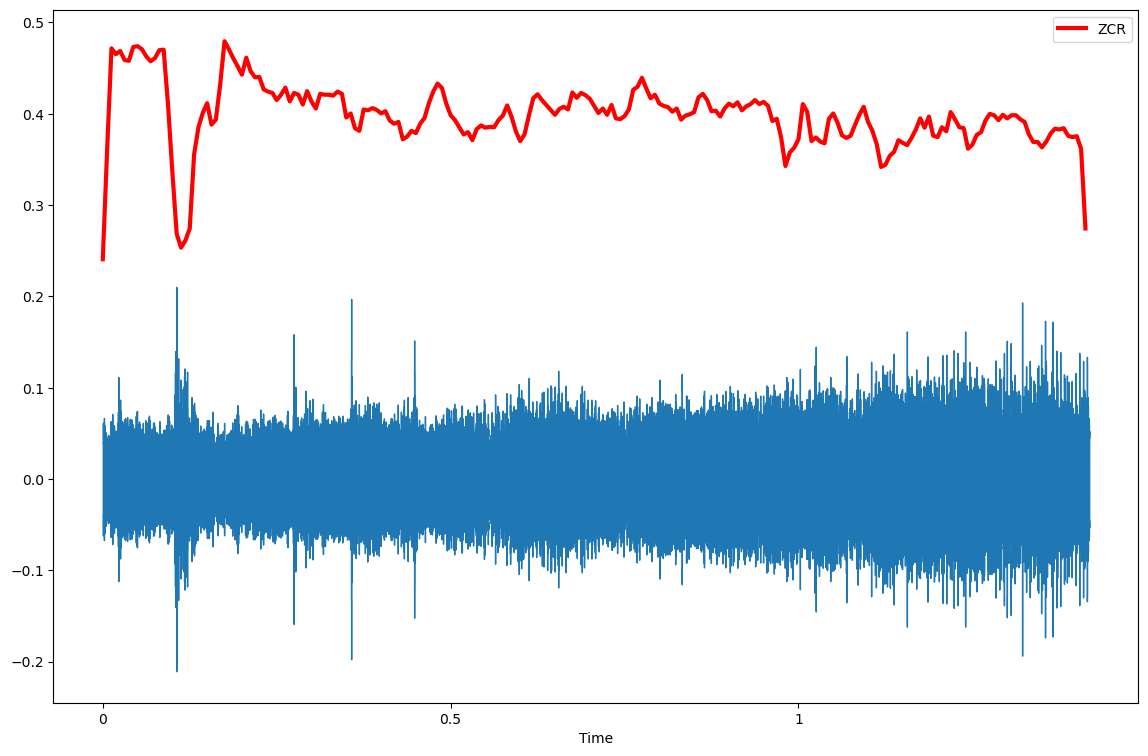

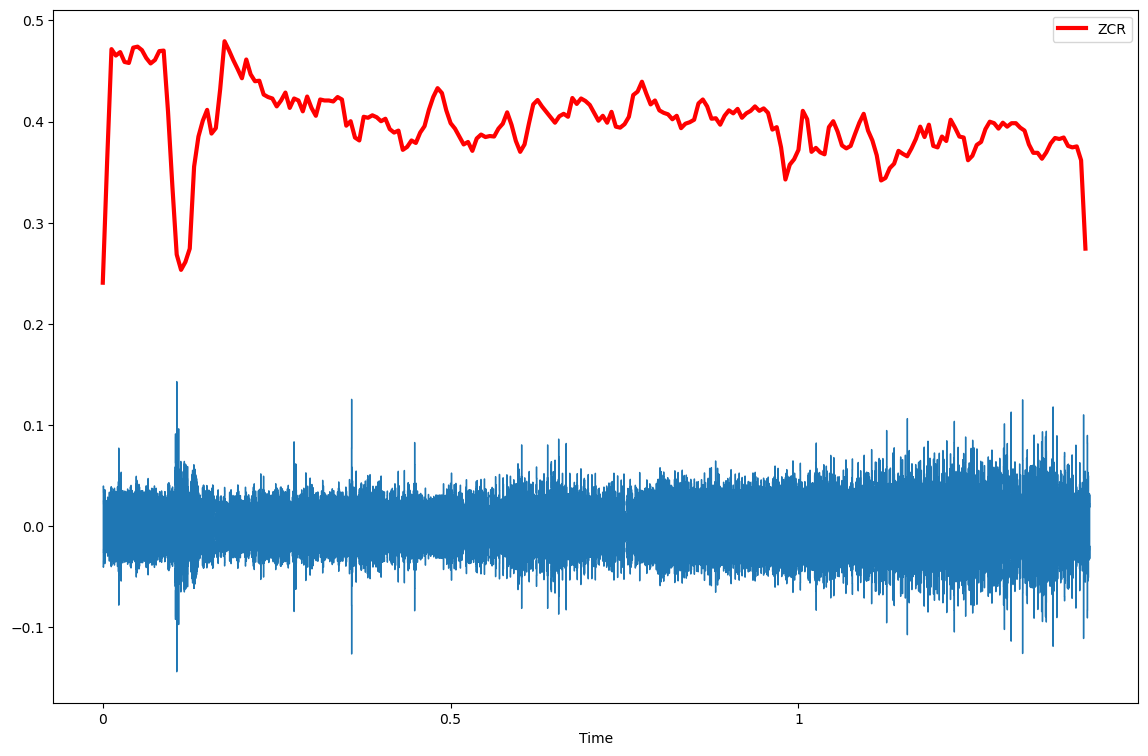

In [18]:
import numpy as np
import librosa
import pywt  # 用于小波变换
import matplotlib.pyplot as plt
import librosa.display

# 加载音频文件
audio_path = '/Users/baijingyuan/jupyterPj/reproducibility/data/click.wav'  # 替换为实际的音频文件路径
y, sr = librosa.load(audio_path, sr=None)

zcr = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize = (14,9))
zcr_time = librosa.frames_to_time(np.arange(len(zcr[0])), sr = sr, hop_length = 512)
librosa.display.waveshow(y = y, sr = sr)
plt.plot(zcr_time, zcr[0], label = "ZCR", lw = 3, color = "red")
plt.legend()

zcr_de = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize = (14,9))
librosa.display.waveshow(y_denoised, sr=sr)
zcr_time = librosa.frames_to_time(np.arange(len(zcr_de[0])), sr = sr, hop_length = 512)
plt.plot(zcr_time, zcr_de[0], label = "ZCR", lw = 3, color = "red")
plt.legend()


### SNR计算

In [33]:
import numpy as np
import math
def calcu_SNR(S, SN):
    S = S-np.mean(S)# 消除直流分量
    S = S/np.max(np.abs(S))#幅值归一化
    mean_S = (np.sum(S))/(len(S))#纯信号的平均值
    PS = np.sum((S-mean_S)*(S-mean_S))
    PN = np.sum((S-SN)*(S-SN))
    snr=10*math.log((PS/PN), 10)
    return(snr)
S = y
SN = y_denoised
snr = calcu_SNR(S, SN)
# snr = np.round(snr)#四舍五入
print('snr=', snr)


snr= 0.7934992077198129
